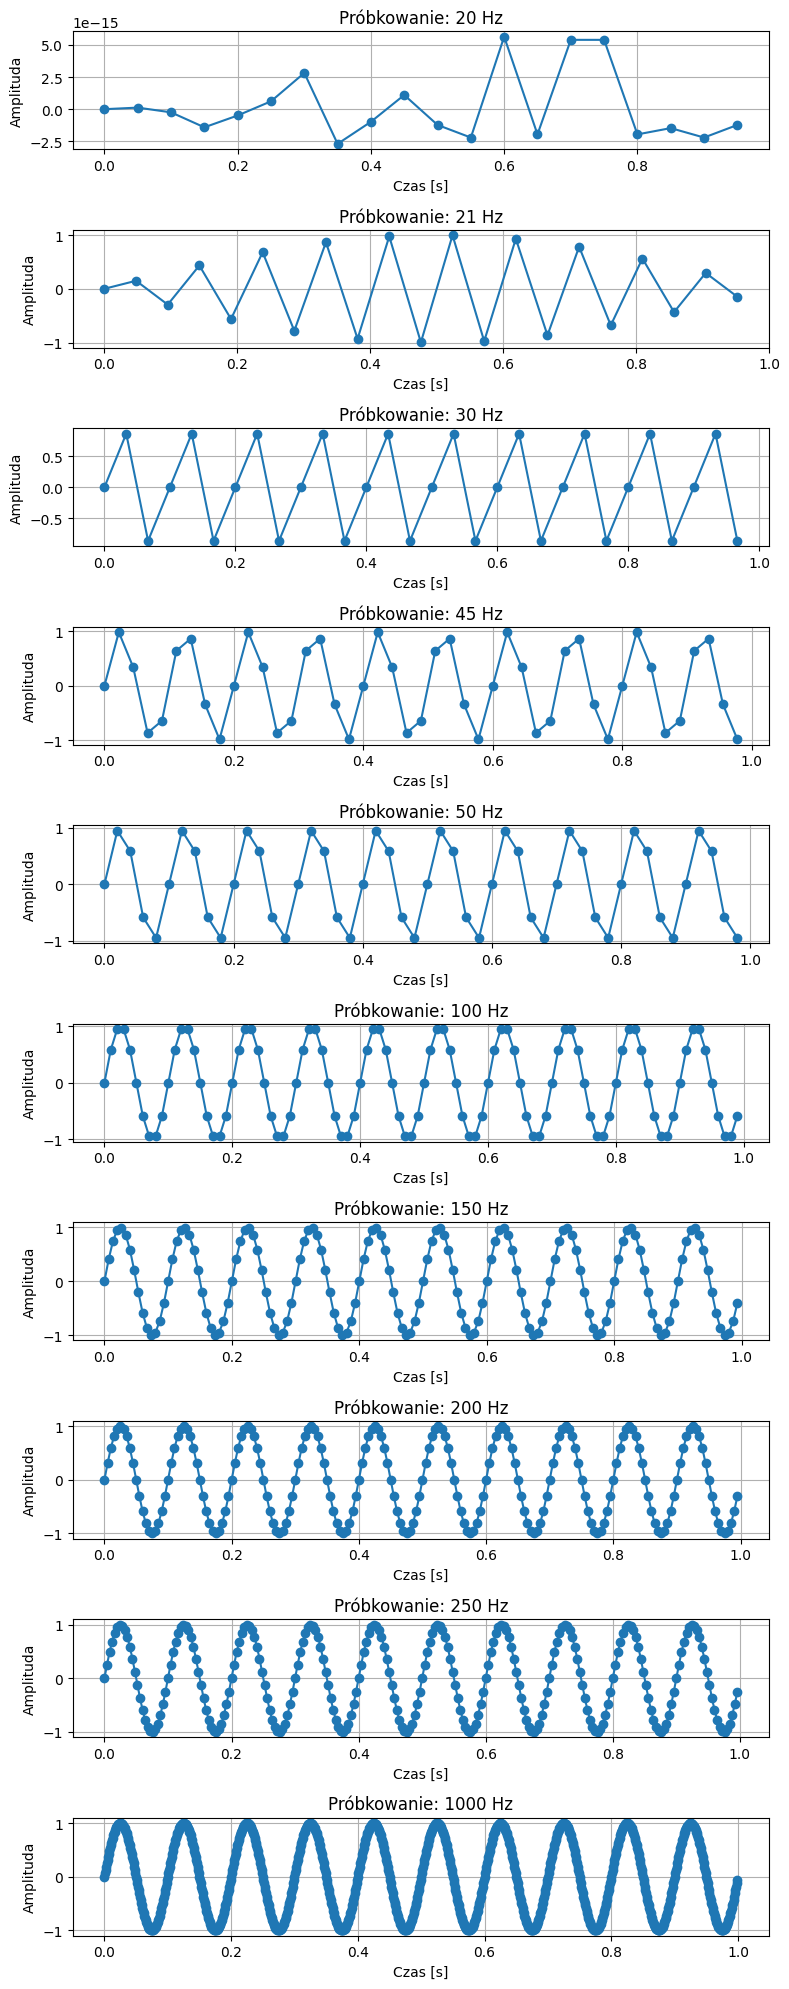

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dyskretyzacja
def generate_signal(freq, sampleFreq, duration=1.0):
    t = np.arange(0, duration, 1/sampleFreq)  
    s = np.sin(2 * np.pi * freq * t)
    return t,s

freq = 10  
Fs_values = [20, 21, 30, 45, 50, 100, 150, 200, 250, 1000]

# Wykresy
fig, axes = plt.subplots(len(Fs_values), 1, figsize=(8, 20))
for i, Fs in enumerate(Fs_values):
    t, s = generate_signal(freq, Fs)
    axes[i].plot(t, s, marker='o', linestyle='-')
    axes[i].set_xlabel('Czas [s]')
    axes[i].set_ylabel('Amplituda')
    axes[i].set_title(f'Próbkowanie: {Fs} Hz')
    axes[i].grid()

plt.tight_layout()
plt.show()

# zadanie 4
# twierdzenie Nyquista-Shannona

# zadanie 5
# aliasing




Liczba wymiarów obrazu: 3
Liczba wartości na pojedynczy piksel: 3


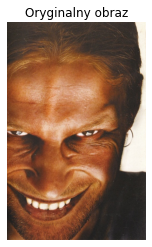

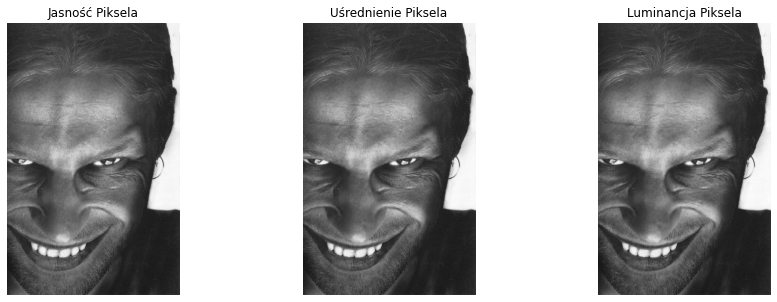

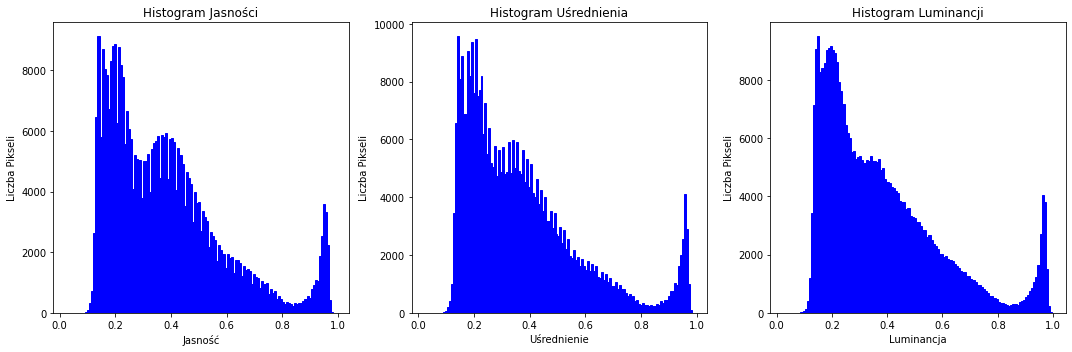

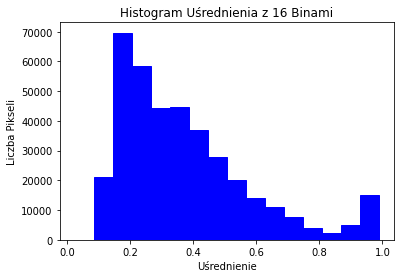

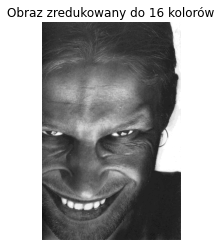

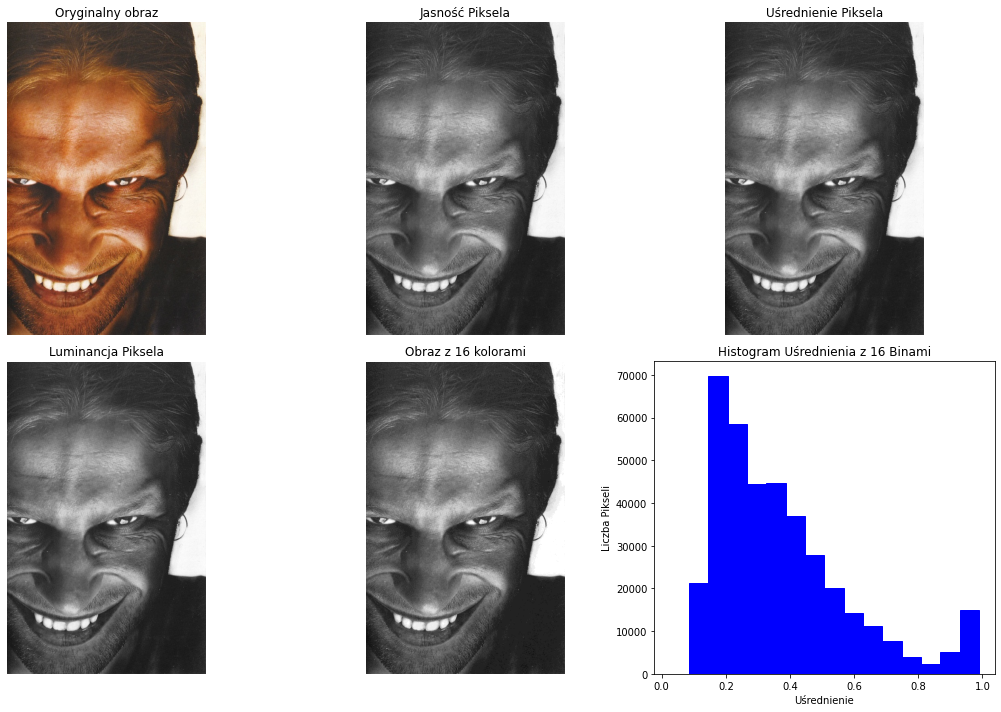

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread(r"C:\Users\student\Desktop\sd55617\aliasing_afx.png")
if img.shape[2] == 4:  
    img = img[:,:,:3]


print(f'Liczba wymiarów obrazu: {img.ndim}') 
print(f'Liczba wartości na pojedynczy piksel: {img.shape[2]}')


plt.imshow(img)
plt.title("Oryginalny obraz")
plt.axis('off')
plt.show()

# Kwantyzacja

# 1. 
pixel_brightness = (np.max(img, axis=2) + np.min(img, axis=2)) / 2

# 2. 
pixel_mean = np.mean(img, axis=2)

# 3. 
pixel_lumination = img[:,:,0]*0.21 + img[:,:,1]*0.72 + img[:,:,2]*0.07

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(pixel_brightness, cmap='gray')
axes[0].set_title('Jasność Piksela')
axes[0].axis('off')

axes[1].imshow(pixel_mean, cmap='gray')
axes[1].set_title('Uśrednienie Piksela')
axes[1].axis('off')

axes[2].imshow(pixel_lumination, cmap='gray')
axes[2].set_title('Luminancja Piksela')
axes[2].axis('off')

plt.show()

# Z.5. 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(pixel_brightness.ravel(), bins='auto', color='blue', edgecolor='blue')
axes[0].set_title("Histogram Jasności")
axes[0].set_xlabel("Jasność")
axes[0].set_ylabel("Liczba Pikseli")

axes[1].hist(pixel_mean.ravel(), bins='auto', color='blue', edgecolor='blue')
axes[1].set_title("Histogram Uśrednienia")
axes[1].set_xlabel("Uśrednienie")
axes[1].set_ylabel("Liczba Pikseli")

axes[2].hist(pixel_lumination.ravel(), bins='auto', color='blue', edgecolor='blue')
axes[2].set_title("Histogram Luminancji")
axes[2].set_xlabel("Luminancja")
axes[2].set_ylabel("Liczba Pikseli")

plt.tight_layout()
plt.show()

# Z.6. 
plt.hist(pixel_mean.ravel(), bins=16, color='blue', edgecolor='blue')
plt.title("Histogram Uśrednienia z 16 Binami")
plt.xlabel("Uśrednienie")
plt.ylabel("Liczba Pikseli")
plt.show()

# Z.7. 
hist, bin_edges = np.histogram(pixel_mean, bins=16, range=(0, 1))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


digitized = np.digitize(pixel_mean, bin_edges) - 1 
reduced_img = bin_centers[digitized]


plt.imshow(reduced_img, cmap='gray')
plt.title("Obraz zredukowany do 16 kolorów")
plt.axis('off')
plt.show()

# Z.8. 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img)
axes[0, 0].set_title("Oryginalny obraz")
axes[0, 0].axis('off')

axes[0, 1].imshow(pixel_brightness, cmap='gray')
axes[0, 1].set_title('Jasność Piksela')
axes[0, 1].axis('off')

axes[0, 2].imshow(pixel_mean, cmap='gray')
axes[0, 2].set_title('Uśrednienie Piksela')
axes[0, 2].axis('off')

axes[1, 0].imshow(pixel_lumination, cmap='gray')
axes[1, 0].set_title('Luminancja Piksela')
axes[1, 0].axis('off')

axes[1, 1].imshow(reduced_img, cmap='gray')
axes[1, 1].set_title('Obraz z 16 kolorami')
axes[1, 1].axis('off')

axes[1, 2].hist(pixel_mean.ravel(), bins=16, color='blue', edgecolor='blue')
axes[1, 2].set_title("Histogram Uśrednienia z 16 Binami")
axes[1, 2].set_xlabel("Uśrednienie")
axes[1, 2].set_ylabel("Liczba Pikseli")

plt.tight_layout()
plt.show()


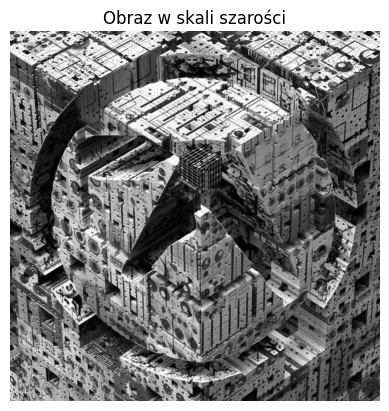

np.int64(51)

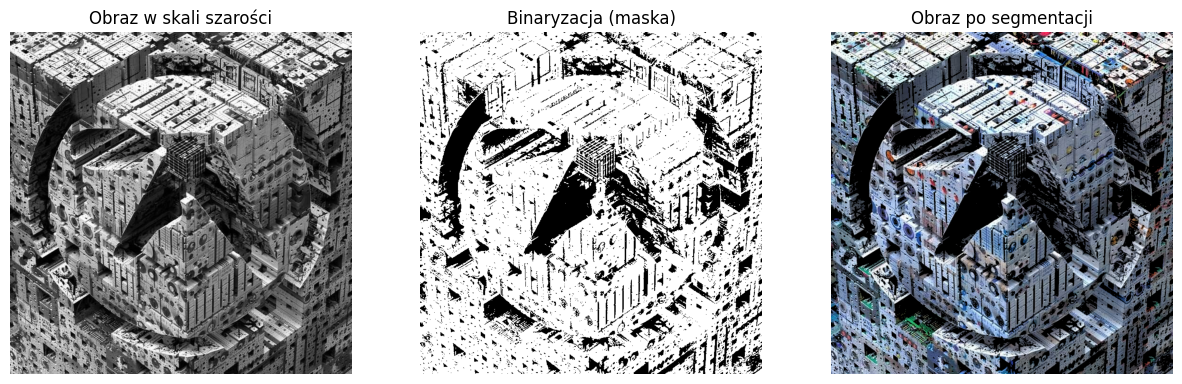

In [19]:
# Binaryzacja

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import argrelextrema


img2 = mpimg.imread(r"C:\Users\DORIAN\Desktop\afx_newphoto.jpg")
if img2.shape[2] == 4:  
    img2 = img2[:,:,:3]

# zadanie 2
pixel_mean1 = np.mean(img2, axis=2)
plt.imshow(pixel_mean1,cmap='gray')
plt.title("Obraz w skali szarości")
plt.axis("off")
plt.show()

histogram, bins = np.histogram(pixel_mean1.flatten(), bins=255, range=[0,255])
# zadanie 3
def find_threshold_point(histogram):
    local_min = argrelextrema(histogram,np.less)[0]
    min_thresholds = local_min[(local_min > 50) & (local_min < 200)]

    if len(min_thresholds) > 0:
        return min_thresholds[0]
    
    return 0


threshold = find_threshold_point(histogram)
display(threshold)

# zadanie 4
bin_image = (pixel_mean1 > threshold).astype(np.uint8)

# zadanie 5
segmented_image = img * bin_image[:, :, np.newaxis]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pixel_mean1, cmap='gray')
axes[0].set_title("Obraz w skali szarości")
axes[0].axis("off")

axes[1].imshow(bin_image, cmap='gray')
axes[1].set_title("Binaryzacja (maska)")
axes[1].axis("off")

axes[2].imshow(segmented_image)
axes[2].set_title("Obraz po segmentacji")
axes[2].axis("off")

plt.show()

